# Analisi sintattica e semantica

1. [**POS tagging**](#POS) del testo dei tweet
    - analisi morfosintattica
        - numero medio di nomi, aggettivi, verbi
        - densità lessicale
2.  [**Analisi sintattica**](#sintattica):
        - depency tgging
3.  [**Analisi semantica**](#semantica) con Name Entity Recognition

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re # regual expression 
import spacy
import string


import emoji


from textblob import TextBlob
from wordcloud import WordCloud
from nltk import *
from nltk.corpus import stopwords 
from nltk.corpus import stopwords 


from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
import pandas as pd
import re
import gensim
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
stopw = stopwords.words('italian') 
Word = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\info\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('data/df_nltk.csv')
del df['Unnamed: 0']
df.shape

(17334, 27)

In [5]:
df.cleaned_tweet

0          didatticaadistanza  sul sito di airc per le ...
1         didatticaadistanza  con i progetti  wikimedia...
2        ho depositato una interrogazione per attivare ...
3        ringraziamo di cuore ciscoitalia che ci ha mes...
4        crediamo nel potere dell'arte, e nella 'missio...
                               ...                        
17329    antonio caramia milaspicola miti vigliero mang...
17330    pov  sei namjoon e sei finalmente riuscito a n...
17331    ofausto forse non è stata la dad ma i vaccini....
17332             i danni della dad   ukrainaunderattack  
17333                            nfloncbs bruce in buffalo
Name: cleaned_tweet, Length: 17334, dtype: object

## Analisi morfo-sintattica

#### Sencence splitting

In [20]:
sent_tokenizer  = nltk.data.load('tokenizers/punkt/italian.pickle')
df['sentences'] = df["cleaned_tweet"].astype(str).apply(sent_tokenizer.tokenize)
#frasiTesto1 = sent_tokenizer.tokenize(raw1)
#frasiTesto2 = sent_tokenizer.tokenize(raw2)
#df['token'] = df["sentences"].astype(str).apply(word_tokenize)

In [21]:
df.sentences

0        [  didatticaadistanza  sul sito di airc per le...
1        [ didatticaadistanza  con i progetti  wikimedi...
2        [ho depositato una interrogazione per attivare...
3        [ringraziamo di cuore ciscoitalia che ci ha me...
4        [crediamo nel potere dell'arte, e nella 'missi...
                               ...                        
17329    [antonio caramia milaspicola miti vigliero man...
17330    [pov  sei namjoon e sei finalmente riuscito a ...
17331    [ofausto forse non è stata la dad ma i vaccini...
17332             [i danni della dad   ukrainaunderattack]
17333                          [nfloncbs bruce in buffalo]
Name: sentences, Length: 17334, dtype: object

### Pos tagging

Per ciascun tweet otteniamo il pos tagging

In [52]:
# elimino stopwords

punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@ー'  
nlp = spacy.load("it_core_news_sm")
def pos_tagging(tweet):
    #elimino numeri
    #tweet = re.sub('([0-9]+)', '', tweet)
    
    new_tweet = []
    #elimino punteggiatura
    #tweet = re.sub('[' + punctuation + ']+', ' ', tweet)   
    for sentence in tweet: # apply lemmatization and tokenization
        sentence = re.sub('\s+', ' ', sentence)  # rimozione doppi spazi
        doc = nlp(sentence)
        tweet_pos_list = []
        for token in doc: # apply lemmatization and tokenization
            
            tweet_pos_list.append(token.pos_) 
        #sentence_string = ' '.join(tweet_pos_list)
        new_tweet.append(tweet_pos_list)

    return new_tweet

df["POS"] = df["sentences"].apply(pos_tagging)

### Analisi POS

Per ciascun tweet otteniamo il pos per ciascuna frase

### Analisi pt 2

Numero medio di NOUN; VERB; ADJ

In [69]:
#df['n_NOUN'] = df["sentences"].apply(lambda x: len(x))
df['n_NOUN'] = df['POS'].apply(lambda x: len([token for sent in x for token in sent if token == 'NOUN']))

In [71]:
print('numero medio NOUN: ', df.n_NOUN.mean())
print('numero medio NOUN account verificati: ',df['n_NOUN'].loc[df['verified'] == True].mean()) #normalize = True)
print('numero medio NOUN account non verificati: ',df['n_NOUN'].loc[df['verified'] == False].mean())

numero medio NOUN:  6.410176531671858
numero medio NOUN account verificati:  8.50909090909091
numero medio NOUN account verificati:  6.3967719461216905


In [75]:
#df['n_NOUN'] = df["sentences"].apply(lambda x: len(x))
df['n_VERB'] = df['POS'].apply(lambda x: len([token for sent in x for token in sent if token == 'VERB']))

In [76]:
print('numero medio VERB: ', df.n_VERB.mean())
print('numero medio VERB account verificati: ',df['n_VERB'].loc[df['verified'] == True].mean()) #normalize = True)
print('numero medio VERB account non verificati: ',df['n_VERB'].loc[df['verified'] == False].mean())

numero medio VERB:  3.4387331256490135
numero medio VERB account verificati:  2.8
numero medio VERB account verificati:  3.4428123548536926


In [77]:
#df['n_NOUN'] = df["sentences"].apply(lambda x: len(x))
df['n_ADJ'] = df['POS'].apply(lambda x: len([token for sent in x for token in sent if token == 'ADJ']))

In [78]:
print('numero medio ADJ: ', df.n_ADJ.mean())
print('numero medio ADJ account verificati: ',df['n_ADJ'].loc[df['verified'] == True].mean()) #normalize = True)
print('numero medio ADJ account non verificati: ',df['n_ADJ'].loc[df['verified'] == False].mean())

numero medio ADJ:  1.9304257528556594
numero medio ADJ account verificati:  2.309090909090909
numero medio ADJ account verificati:  1.9280074314909428


### Dizionario POS-Lemma per analisi freq di parole significative

In [81]:
# elimino stopwords

punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@ー'  
nlp = spacy.load("it_core_news_sm")
def lemma_pos(tweet):
    #elimino numeri
    #tweet = re.sub('([0-9]+)', '', tweet)
    #elimino punteggiatura
    #tweet = re.sub('[' + punctuation + ']+', ' ', tweet)   
    tweet_pos_lemma_list = {}
    for sentence in tweet: # apply lemmatization and tokenization
        sentence = re.sub('\s+', ' ', sentence)  # rimozione doppi spazi
        doc = nlp(sentence)
        for token in doc: # apply lemmatization and tokenization    
            tweet_pos_lemma_list[token.pos_] = token.lemma_
        #sentence_string = ' '.join(tweet_pos_list)

    return tweet_pos_lemma_list

df["POS_lemma"] = df["sentences"].apply(lemma_pos)

In [82]:
df["POS_lemma"] 

0        {'SPACE': ' ', 'NOUN': 'grado', 'ADP': 'di', '...
1        {'SPACE': ' ', 'NOUN': 'scuola', 'ADP': 'di il...
2        {'AUX': 'potere', 'VERB': 'coronaviruschalleng...
3        {'VERB': 'riguardare', 'ADP': 'di il', 'NOUN':...
4        {'VERB': 'portare', 'ADP': 'in il', 'NOUN': 'd...
                               ...                        
17329    {'ADJ': 'elisaperego', 'NOUN': 'pandemia', 'VE...
17330    {'ADP': 'da id', 'NUM': 'sei', 'NOUN': 'proud'...
17331    {'NOUN': 'danno', 'ADV': 'certo', 'AUX': 'son'...
17332    {'DET': 'il', 'NOUN': 'ukrainaunderattack', 'A...
17333    {'PROPN': 'Nfloncbs', 'VERB': 'brucere', 'ADP'...
Name: POS_lemma, Length: 17334, dtype: object

In [88]:
# elimino stopwords

punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@ー'  
nlp = spacy.load("it_core_news_sm")
def significant_lemmas(tweet):
    list_POS = ['NOUN', 'ADJ', 'ADV', 'PROPN', 'X']
    #elimino numeri
    #tweet = re.sub('([0-9]+)', '', tweet)
    #elimino punteggiatura
    #tweet = re.sub('[' + punctuation + ']+', ' ', tweet)   
    tweet_pos_lemma_list = []
    for sentence in tweet: # apply lemmatization and tokenization
        sentence = re.sub('\s+', ' ', sentence)  # rimozione doppi spazi
        doc = nlp(sentence)
        for token in doc: # apply lemmatization and tokenization   
            if token.pos_ in  list_POS:
                tweet_pos_lemma_list.append(token.lemma_)
        tweet = ' '.join(tweet_pos_lemma_list)
        tweet = re.sub('\s+', ' ', tweet)
        #sentence_string = ' '.join(tweet_pos_list)

    return tweet

df["significant_words"] = df["sentences"].apply(significant_lemmas)

In [89]:
df["significant_words"]

0        didatticaadistanza sito airc scuola disponibil...
1        didatticaadistanza progetto wikimedio docente ...
2        interrogazione misura accompagnamento chiusura...
3        cuore ciscoitalia disposizione piattaforma rea...
4        potere arte mission museo anche periodo partic...
                               ...                        
17329    Antonio caramia milaspicola mite vigliero udog...
17330    namjoon finalmente non Jungkook discorso smile...
17331    ofausto forse non dad vaccino vallo sapè certo...
17332                         danno dad ukrainaunderattack
17333                                     Nfloncbs buffalo
Name: significant_words, Length: 17334, dtype: object

In [90]:
tok = ''.join(df['significant_words'].astype(str)).split()
tok

['didatticaadistanza',
 'sito',
 'airc',
 'scuola',
 'disponibile',
 'contenuto',
 'strumento',
 'gratuito',
 'studente',
 'docente',
 'scuola',
 'ordine',
 'gradodidatticaadistanza',
 'progetto',
 'wikimedio',
 'docente',
 'corso',
 'miursocial',
 'avanti',
 'attività',
 'classe',
 'anche',
 'periodo',
 'chiusura',
 'scuolainterrogazione',
 'misura',
 'accompagnamento',
 'chiusura',
 'scuola',
 'bambino',
 'bambino',
 'futuro',
 'stesso',
 'opportunità',
 'didatticaadistanza',
 'covid',
 'scuolacuore',
 'ciscoitalia',
 'disposizione',
 'piattaforma',
 'realizzazione',
 'Webinar',
 'mondo',
 'scuola',
 'insieme',
 'più',
 'forte',
 'paroleostile',
 'didatticaadistanza',
 'Webinarpotere',
 'arte',
 'mission',
 'museo',
 'anche',
 'periodo',
 'particolarmente',
 'difficile',
 'didattica',
 'distanza',
 'domenica',
 'casa',
 'Kidsday',
 'buono',
 'divertimento',
 'didatticaadistanzadidatticaadistanza',
 'oggi',
 'secondo',
 'appuntamento',
 'Kidsday',
 'virtuale',
 'fb',
 'instagram',
 't

In [91]:
freqdist = FreqDist(tok).most_common(20)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

dad                   9478
non                   7109
scuola                3664
didatticaadistanza    1632
anche                 1630
più                   1585
anno                  1516
solo                  1221
ora                   1168
presenza              1064
studente              1022
classe                 930
lezione                925
giorno                 774
poi                    774
casa                   764
covid                  747
figlio                 671
ragazzo                629
insegnante             615
dtype: int64

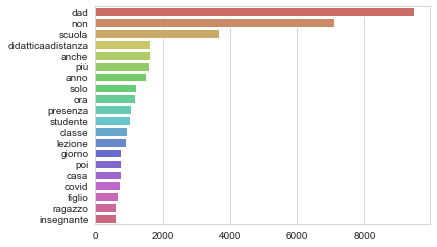

In [306]:
sns.set_style("whitegrid") 
sns.barplot(x=freqdistPlot.values, y=freqdistPlot.index, palette = 'hls')
plt.show()

(-0.5, 999.5, 499.5, -0.5)

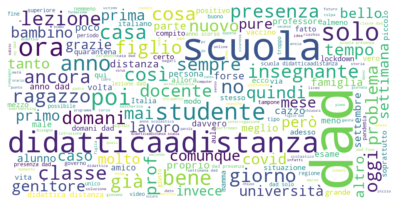

In [94]:
#stopwords = set(stopwords.words('english'))  
tweet_df = df
words = ' '.join([word for word in tweet_df['significant_words'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=20, max_font_size=150, background_color = 'white', colormap='viridis', stopwords = stopw).generate(words)


plt.imshow(word_cloud, interpolation='bilinear')
#plt.savefig('img/wordcloud_parole_tot.jpg')
plt.tight_layout()
plt.axis('off')

### Densità lessicale

In [316]:
def count_significant_POS(tweet):
    list_POS = ['NOUN', 'ADJ', 'VERB']
    total_count = 0
    count = 0
    for sent in tweet:
        for pos in sent:
            total_count = total_count + 1
            if pos in list_POS:
                count = count + 1 
    
    lexical_dens = count / total_count
    return lexical_dens     



In [317]:
df['lexical_density'] = df['POS'].apply(count_significant_POS) 

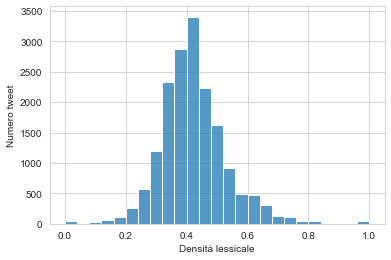

In [318]:
sns.histplot(data=df, x=df['lexical_density'], bins=25)
plt.xlabel('Densità lessicale')
plt.ylabel("Numero tweet")
plt.show()

La densità lessicale di un testo è il rapporto tra il numero di token che costituiscono
parole piene e il totale dei token.

In [319]:
df['lexical_density'].mean()

0.42160965390110317

In [321]:
print('densità lessicale media fra account verificati: ',df['lexical_density'].loc[df['verified'] == True].mean()) #normalize = True)
print('densità lessicale media fra account non verificati: ',df['lexical_density'].loc[df['verified'] == False].mean())

densità lessicale media fra account verificati:  0.4477299670239774
densità lessicale media fra account non verificati:  0.42144283815310524


## Analisi semantica (NER)

In [18]:
# Functions to clean tweets
def remove_links(tweet):
    """Takes a string and removes web links from it"""
    tweet = re.sub(r'http\S+', '', tweet)   # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet)  # remove bitly links
    tweet = tweet.strip('[link]')   # remove [links]
    tweet = re.sub(r'pic.twitter\S+','', tweet)
    return tweet

def remove_users(tweet):
    """Takes a string and removes retweet and @user information"""
   # tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove re-tweet
    tweet = re.sub('(@)', '', tweet)  # remove tweeted at
    return tweet

def remove_hashtags(tweet):
    """Takes a string and removes any hash tags"""
    tweet = re.sub('(#)', ' ', tweet)  # remove hash tags
    
    return tweet

def remove_av(tweet):
    """Takes a string and removes AUDIO/VIDEO tags or labels"""
    tweet = re.sub('VIDEO:', '', tweet)  # remove 'VIDEO:' from start of tweet
    tweet = re.sub('AUDIO:', '', tweet)  # remove 'AUDIO:' from start of tweet
    return tweet

import emoji

#checking if a character is an emoji
def char_is_emoji(character):
    return character in emoji.UNICODE_EMOJI

#remove the emoji
def deEmojify(inputString):
    return inputString.encode('utf-8', 'ignore').decode('utf-8')

import emoji
    
def strip_emoji(tweet):
    #print(emoji.emoji_count(tweet))
    tweet = re.sub(emoji.get_emoji_regexp(), r"", tweet)
    return tweet

special_punctuation = '$%&\*+/-<=>[\\]^_`{|}~•@'
def clean_tweets(tweet):
    """Main master function to clean tweets only without tokenization or removal of stopwords"""
    # 1. rimozione simboli speciali   
    tweet = remove_users(tweet) # rimozione info users
    tweet = remove_hashtags(tweet) # rimozione simbolo #
    tweet = remove_links(tweet) # rimozione links  
    tweet = remove_av(tweet) # rimozione audio e video    
    # Checking if emoji in tokens column, use for EDA purposes otherwise not necessary to keep this column
    #df['emoji'] = df['token'].apply(lambda x: text_has_emoji(x))
    
    
    # 2. normalizzazione e rimozione punteggiatura speciale e doppi spai
    #tweet = tweet.lower()  # lower case
    tweet = emoji.replace_emoji(tweet)
    # Removing Emojis from tokens
    #df['token'] = df['token'].apply(lambda x: deEmojify(x))
    
    tweet = re.sub('['+special_punctuation+']+', ' ', tweet)  # strip special punctuation
    #tweet = re.sub('\s+', ' ', tweet)  # remove double spacing
    #tweet = re.sub('([0-9]+)', '', tweet)  # remove numbers
    #tweet = re.sub('amp', ' ', tweet) # rimozione simbolo '&'     
    return tweet

In [22]:
df_ner = pd.DataFrame()
df_ner["tweet"] = df.tweet.astype("str")
df_ner["cleaned_tweet"] = df_ner["tweet"].apply(clean_tweets)

1.	ORGANIZATION	Microsoft, Facebook
2.	PERSON	Rafael Nadal, Nelson Mandela
3.	MONEY	9 million dollars, INR 4 Crore
4.	GPE	India, Australia, South East Asia
5.	LOCATION	Mount Everest, River Ganga
6.	DATE	9th May 1987, 4 AUG
7.	TIME	7:23 A.M., three-forty am

In [25]:
nlp = spacy.load("it_core_news_sm")
def ner_tagging(df):
    ent_text = []
    label_list = []
    text_list =[]
    for tweet in df:
        doc = nlp(tweet)
        for ent in doc.ents:
            ent_text.append((ent.label_,  ent.text))
            label_list.append(ent.label_)
            text_list.append(ent.text)
    return ent_text, label_list, text_list

In [26]:
ent_text, label_list, text_list = ner_tagging(df_ner.cleaned_tweet)

In [27]:
df_ent = pd.DataFrame()
df_ent['label'] = label_list
df_ent['text'] = text_list

In [28]:
df_ent

,label,text
0,ORG,AIRC
1,ORG,Wikimedia
2,MISC,OpenStreetMap
3,MISC,MiurSocial
4,PER,Covid
...,...,...
28235,MISC,Forse
28236,MISC,DAD
28237,LOC,Vallo
28238,MISC,DAD UkrainaUnderAttack


In [58]:
df_ent.label.value_counts().sum()

28240

In [30]:
freqdist_h = FreqDist(label_list).most_common(30)
freqdistPlotHash = pd.Series(dict(freqdist_h))
freqdistPlotHash

MISC    13864
LOC      6390
PER      6279
ORG      1707
dtype: int64

In [59]:
df_ent['text'].loc[df_ent['label'] == 'ORG'].value_counts().head(20) #normalize = True)

AzzolinaLucia      47
DarioBressanini    29
American Dad       25
Covid-             16
Didattica          15
DS                 15
Azzolina           14
TIM                11
HMQueenBee          9
Università          9
BES                 9
ASL                 8
American            8
DIDATTICA           8
Cagliari            8
GiuseppeConteIT     8
MAI                 8
Corriere            8
Istruzione          8
PS                  8
Name: text, dtype: int64

In [65]:
df_ent['text'].loc[df_ent['label'] == 'MISC'].value_counts().head(30) #normalize = True)

DAD                   1880
DaD                    724
Dad                    685
AzzolinaLucia           78
PC                      71
Natale                  55
YouTube                 53
DAD                     48
MiurSocial              46
CottarelliCPI           41
MilaSpicola             40
pc                      38
Dad                     36
GiovanniToti            34
IsaInghirami            33
Riforma                 30
DPCM                    29
vax                     24
DidatticaaDistanza      24
La DAD                  23
GP                      22
Covid                   22
internet                21
EnricoLetta             20
Nuovo Podcast!          20
Google                  19
Draghi                  19
DDI                     19
FORMAZIONE              17
ANICIA                  17
Name: text, dtype: int64

In [33]:
df_ent['text'].loc[df_ent['label'] == 'PER'].value_counts().head(20) #normalize = True)

Covid              131
po’                 84
Irama               56
Spero               47
Conte               41
Coronavirus         37
Mio                 35
Draghi              33
Firma               32
Amici               30
aerosol             28
Bianchi             27
DaD.                26
Qui    Archivio     26
Emiliano            24
Siete               23
De Luca             21
Antonio Caramia     21
Raga                19
Lucia Azzolina      18
Name: text, dtype: int64

In [61]:
df_ent['text'].loc[df_ent['label'] == 'LOC'].value_counts().head(30) #normalize = True)

COVID                                         196
Italia                                        192
Covid                                         100
Sanremo                                        87
Roma                                           60
Milano                                         52
COVID italia                                   52
Azzolina                                       47
Campania                                       43
Puglia                                         39
Lombardia                                      37
Europa                                         34
Didattica                                      32
Paese                                          31
Distanza                                       30
Stato                                          30
Bonus   Didatticaadistanza Piano Nazionale     30
Italy                                          28
Scuola                                         28
Napoli                                         25


In [40]:
from spacy import displacy

text = df_ner.cleaned_tweet[81]
nlp = spacy.load("it_core_news_sm")
doc = nlp(text)
displacy.render (doc, style="ent")

In [41]:
text = df_ner.cleaned_tweet[12]
nlp = spacy.load("it_core_news_sm")
doc = nlp(text)
displacy.render (doc, style="ent")

In [50]:
text = df_ner.cleaned_tweet[60]
nlp = spacy.load("it_core_news_sm")
doc = nlp(text)
displacy.render (doc, style="ent")

In [56]:
text = df_ner.cleaned_tweet[84]
nlp = spacy.load("it_core_news_sm")
doc = nlp(text)
displacy.render (doc, style="ent")

In [44]:
text = df_ner.cleaned_tweet[27]
nlp = spacy.load("it_core_news_sm")
doc = nlp(text)
displacy.render (doc, style="ent")